In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Importing and Checking Loan Data

In [2]:
zip_df = pd.read_csv("zip_only_data.csv")

In [3]:
zip_df.head()

Unnamed: 0 zip_code  applicant_result
0           0    481xx                 0
1           1    010xx                 0
2           2    212xx                 0
3           3    017xx                 0
4           4    209xx                 0

In [4]:
zip_df = zip_df.drop(['Unnamed: 0'], axis = 1)

In [5]:
zip_df.head()

zip_code  applicant_result
0    481xx                 0
1    010xx                 0
2    212xx                 0
3    017xx                 0
4    209xx                 0

In [6]:
zip_df['zip_code'].value_counts()

112xx    291010
770xx    281401
300xx    280926
331xx    264547
606xx    256209
          ...  
004xx        11
869xx        10
699xx         9
579xx         3
09Oxx         1
Name: zip_code, Length: 1001, dtype: int64

In [7]:
zip_df.isnull().sum()

zip_code            0
applicant_result    0
dtype: int64

## Importing and Checking Map Data

In [8]:
df = gpd.read_file('tl_rd22_us_zcta520.shp')

In [9]:
df_2015 = gpd.read_file('tl_2015_us_zcta510.shp')

In [9]:
# Print out the columns
print('===== Columns ======')
print(df.columns)
print()

# Print out one row of data
print('===== First row =====')
print(df.loc[0])

===== Columns ======
Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

===== First row =====
ZCTA5CE20                                                 35592
GEOID20                                                   35592
CLASSFP20                                                    B5
MTFCC20                                                   G6350
FUNCSTAT20                                                    S
ALAND20                                               298552385
AWATER20                                                 235989
INTPTLAT20                                          +33.7427261
INTPTLON20                                         -088.0973903
geometry      POLYGON ((-88.247351 33.653896, -88.247132 33....
Name: 0, dtype: object


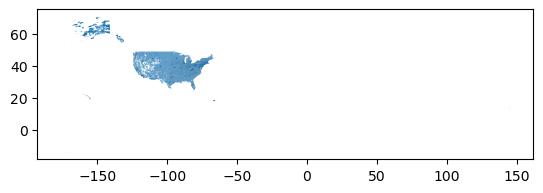

In [10]:
df.plot()
plt.savefig('world.png')

## Setting the Zip Code Data

#### Ratio of accepted applicants to total

In [10]:
zip_ratio = pd.DataFrame(columns=['accepted_to_total_ratio', 'zip_code'])

In [11]:
zip_df['zip_code'][zip_df['zip_code']=="09Oxx"] = "090xx"

C:\Users\orteg\AppData\Local\Temp\ipykernel_8032\660033160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['zip_code'][zip_df['zip_code']=="09Oxx"] = "090xx"


In [12]:
zip_df.reset_index(drop=True, inplace=True)

In [13]:
group_zip = zip_df.groupby(['zip_code', 'applicant_result']).size()

In [14]:
group_zip = pd.DataFrame(group_zip, columns=['Count'])

In [15]:
group_zip.reset_index(inplace=True)

In [16]:
group_zip.head(10)

zip_code  applicant_result  Count
0    000xx                 0    646
1    001xx                 0    455
2    002xx                 0    498
3    003xx                 0     41
4    004xx                 0     11
5    005xx                 0     94
6    006xx                 0    523
7    007xx                 0    595
8    007xx                 1      5
9    008xx                 0    374

In [22]:
for code in group_zip['zip_code']:
    if code.find('O') != -1:
        print(code)

In [23]:
group_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   zip_code          1956 non-null   object
 1   applicant_result  1956 non-null   int64 
 2   Count             1956 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.0+ KB


In [24]:
temp_df = pd.DataFrame(columns=['accepted_rejected_ratio'])

In [25]:
group_zip['Count'][(group_zip['zip_code']=="001xx") & (group_zip['applicant_result']==1)].sum()

0

In [26]:
for zip_code in group_zip['zip_code']:
    temp_df.loc[len(temp_df)] = [group_zip['Count'][(group_zip['zip_code']==zip_code) & (group_zip['applicant_result']==1)].sum()
                                 /group_zip['Count'][group_zip['zip_code']==zip_code].sum()]

In [27]:
concat_zip = pd.concat([group_zip, temp_df], axis=1)

In [28]:
concat_zip.sort_values(by='accepted_rejected_ratio', ascending=False).head(10)

zip_code  applicant_result  Count  accepted_rejected_ratio
197     102xx                 1    221                 0.160727
196     102xx                 0   1154                 0.160727
1116    569xx                 0     18                 0.142857
1366    698xx                 0     12                 0.142857
1117    569xx                 1      3                 0.142857
1367    698xx                 1      2                 0.142857
182     094xx                 1     33                 0.139241
181     094xx                 0    204                 0.139241
434     222xx                 0  13298                 0.138731
435     222xx                 1   2142                 0.138731

In [29]:
len(concat_zip[concat_zip['applicant_result']==0])

1000

In [30]:
concat_zip = concat_zip[concat_zip['applicant_result']==0]

In [31]:
concat_zip.reset_index(drop=True, inplace=True)

In [32]:
print(concat_zip.shape)
print(concat_zip.head(10))

(1000, 4)
  zip_code  applicant_result  Count  accepted_rejected_ratio
0    000xx                 0    646                 0.000000
1    001xx                 0    455                 0.000000
2    002xx                 0    498                 0.000000
3    003xx                 0     41                 0.000000
4    004xx                 0     11                 0.000000
5    005xx                 0     94                 0.000000
6    006xx                 0    523                 0.000000
7    007xx                 0    595                 0.008333
8    008xx                 0    374                 0.020942
9    009xx                 0    809                 0.002466


# End Good Code

## Merging the Data

In [74]:
df_2015.head()

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     43451   43451        B5   G6350          S   63411475    157689   
1     43452   43452        B5   G6350          S  121783676  13437379   
2     43456   43456        B5   G6350          S    9389361    999166   
3     43457   43457        B5   G6350          S   48035540         0   
4     43458   43458        B5   G6350          S    2573816     39915   

    INTPTLAT10    INTPTLON10  \
0  +41.3183010  -083.6174935   
1  +41.5157923  -082.9809454   
2  +41.6468445  -082.8226641   
3  +41.2673266  -083.4274645   
4  +41.5304461  -083.2133648   

                                            geometry  
0  POLYGON ((-83.67446 41.33112, -83.67444 41.331...  
1  POLYGON ((-83.06775 41.53772, -83.06773 41.539...  
2  MULTIPOLYGON (((-82.85660 41.68122, -82.85683 ...  
3  POLYGON ((-83.46747 41.26819, -83.46760 41.268...  
4  POLYGON ((-83.22229 41.53102, -83.22228 41.532...

In [67]:
df.head()

ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20    ALAND20  AWATER20  \
0     35592   35592        B5   G6350          S  298552385    235989   
1     35616   35616        B5   G6350          S  559506992  41870756   
2     35621   35621        B5   G6350          S  117838488    409438   
3     35651   35651        B5   G6350          S  104521045    574316   
4     36010   36010        B5   G6350          S  335675180    236811   

    INTPTLAT20    INTPTLON20  \
0  +33.7427261  -088.0973903   
1  +34.7395036  -088.0193814   
2  +34.3350314  -086.7270557   
3  +34.4609087  -087.4801507   
4  +31.6598950  -085.8128958   

                                            geometry  
0  POLYGON ((-88.24735 33.65390, -88.24713 33.654...  
1  POLYGON ((-88.13997 34.58184, -88.13995 34.582...  
2  POLYGON ((-86.81659 34.34960, -86.81649 34.349...  
3  POLYGON ((-87.53087 34.42492, -87.53082 34.429...  
4  POLYGON ((-85.95712 31.67744, -85.95676 31.677...

In [33]:
df_2015['zip_code'] = df_2015['ZCTA5CE10'].astype('str')
df_2015['zip_code'] = df_2015['zip_code'].str.pad(5, 'left', '0')
df_2015['zip_code'] = df_2015['zip_code'].str.slice(0,3)
df_2015['zip_code'] = df_2015['zip_code'].str.pad(5, 'right', 'x')

In [34]:
df['zip_code'] = df['ZCTA5CE20'].astype('str')
df['zip_code'] = df['zip_code'].str.pad(5, 'left', '0')
df['zip_code'] = df['zip_code'].str.slice(0,3)
df['zip_code'] = df['zip_code'].str.pad(5, 'right', 'x')

In [69]:
df.head()

ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20    ALAND20  AWATER20  \
0     35592   35592        B5   G6350          S  298552385    235989   
1     35616   35616        B5   G6350          S  559506992  41870756   
2     35621   35621        B5   G6350          S  117838488    409438   
3     35651   35651        B5   G6350          S  104521045    574316   
4     36010   36010        B5   G6350          S  335675180    236811   

    INTPTLAT20    INTPTLON20  \
0  +33.7427261  -088.0973903   
1  +34.7395036  -088.0193814   
2  +34.3350314  -086.7270557   
3  +34.4609087  -087.4801507   
4  +31.6598950  -085.8128958   

                                            geometry zip_code  
0  POLYGON ((-88.24735 33.65390, -88.24713 33.654...    355xx  
1  POLYGON ((-88.13997 34.58184, -88.13995 34.582...    356xx  
2  POLYGON ((-86.81659 34.34960, -86.81649 34.349...    356xx  
3  POLYGON ((-87.53087 34.42492, -87.53082 34.429...    356xx  
4  POLYGON ((-85.95712 31.67744, -85.95676 31.677...    360xx

In [35]:
df_map_2015 = df_2015.merge(concat_zip[['zip_code', 'accepted_rejected_ratio']], on='zip_code', how='inner')

In [36]:
df_map = df.merge(concat_zip[['zip_code', 'accepted_rejected_ratio']], on='zip_code', how='inner')

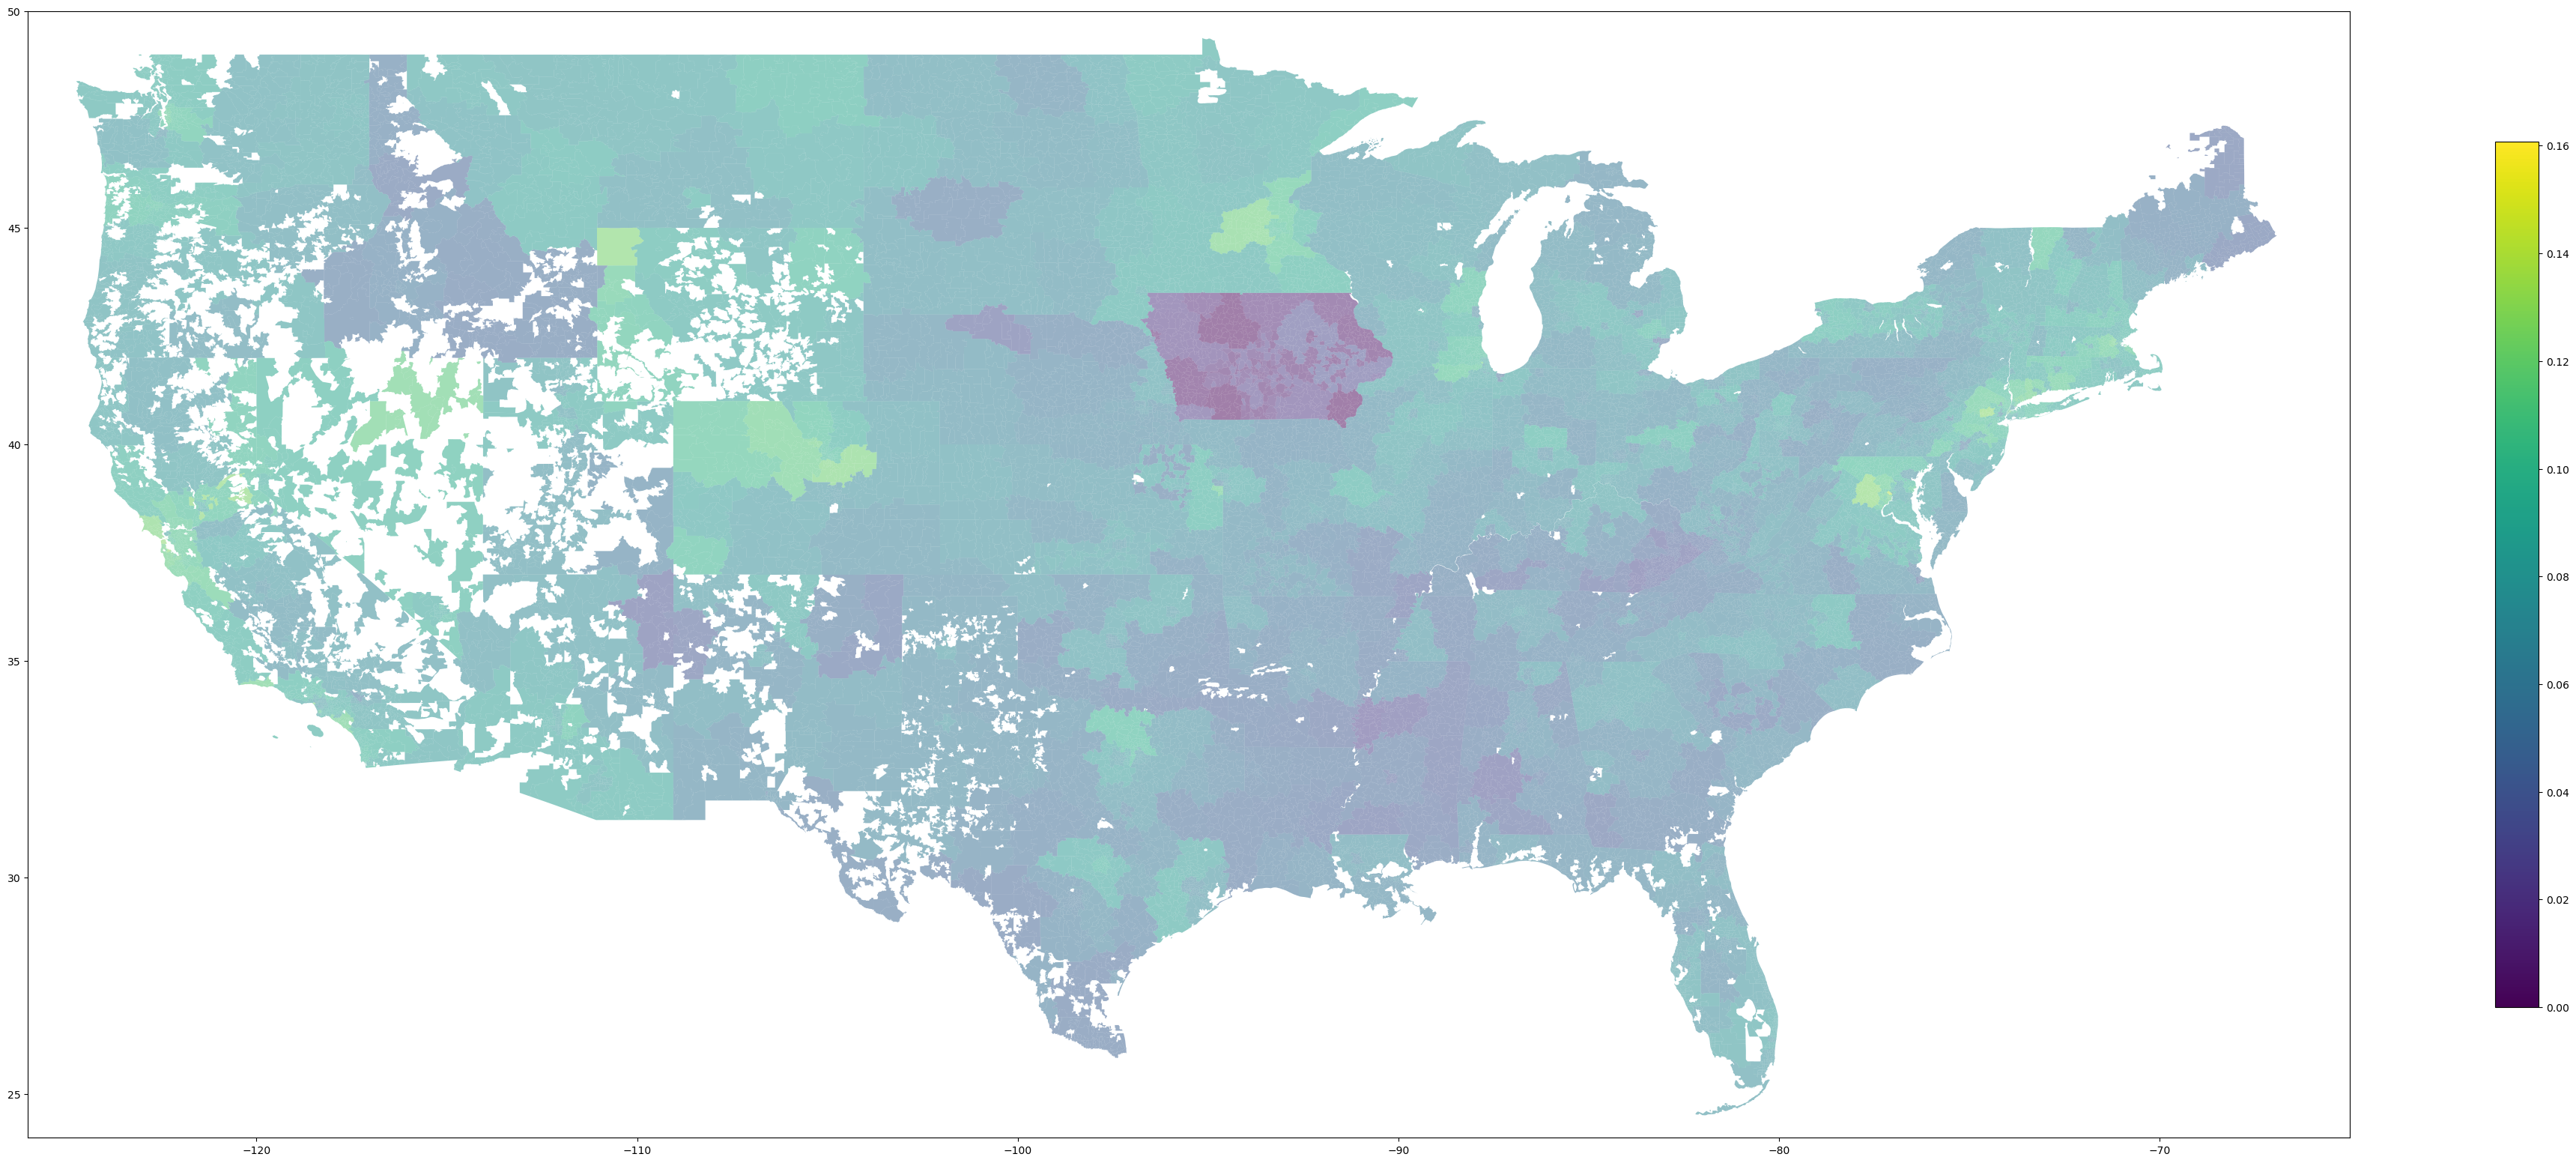

In [88]:
fig, ax = plt.subplots(1, figsize=(50, 50))
df_map.plot(column = df_map['accepted_rejected_ratio'], cmap='viridis', legend=True, 
            legend_kwds={'shrink': 0.3}, ax=ax, alpha=.5)
ax.set_xlim(-126, -65)
ax.set_ylim(24, 50)
#plt.axis('off')
plt.show()

In [37]:
import matplotlib

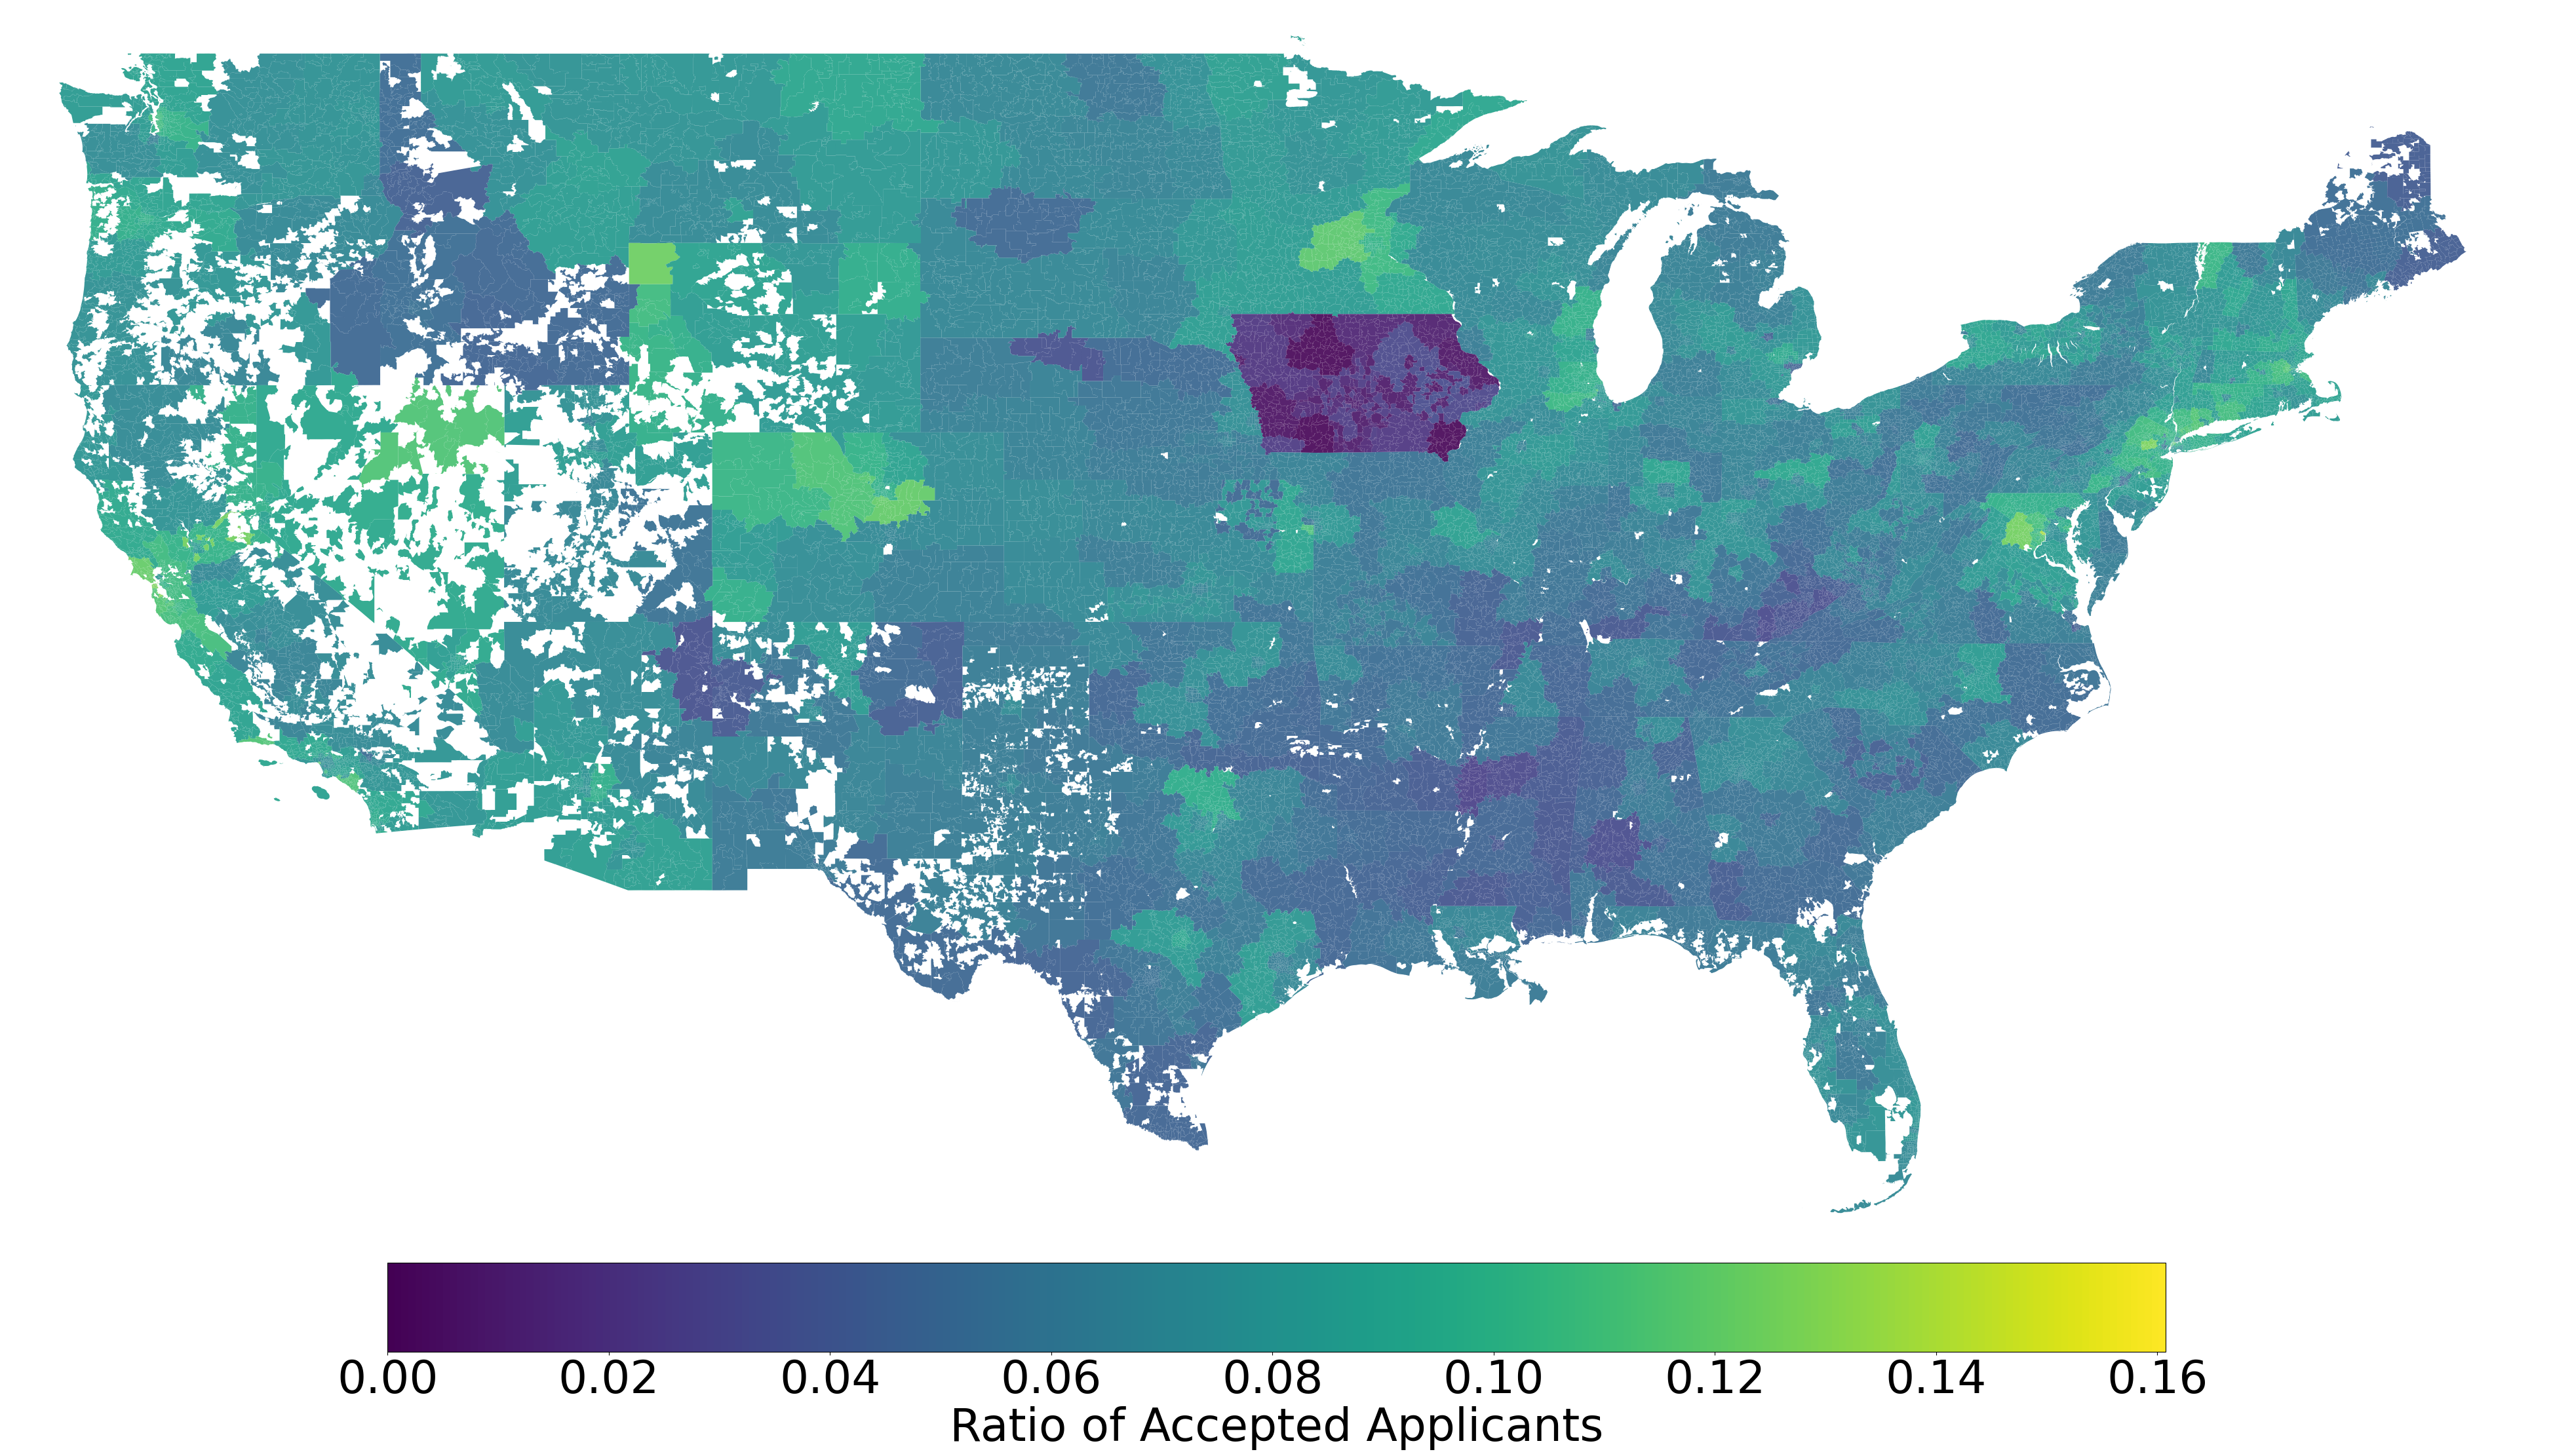

In [40]:
matplotlib.rcParams['font.size'] = 50
fig, ax = plt.subplots(1, figsize=(50, 50))
df_map_2015.plot(column = df_map_2015['accepted_rejected_ratio'], cmap='viridis', legend=True, 
            legend_kwds={'label': "Ratio of Accepted Applicants", 'orientation': "horizontal", "pad": 0.01,
                        "shrink": .7}, ax=ax, alpha=.9)
ax.set_xlim(-126, -65)
ax.set_ylim(24, 50)
plt.axis('off')
plt.title
plt.show()

In [80]:
len(pd.unique(df_2015['zip_code']))

896

In [81]:
len(pd.unique(df['zip_code']))

896

In [97]:
not_found = []

In [98]:
for zipcode in concat_zip['zip_code']:
    if zipcode not in pd.unique(df['zip_code']):
        not_found.append(zipcode[0:3])

In [99]:
len(not_found)

104

Missing values are because of prefixes that are not used, military bases, redundant codes Atlanta 311\303, and other special circumstances.